In [22]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import pingouin as pg 

import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(rc = {'figure.figsize':(12,6)}, style = "whitegrid")


In [2]:
df = pd.read_csv("C:/Users/spit/Desktop/math/8/8 bootstrap_data.csv")

In [3]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [4]:
df.group.unique()

array(['experimental', 'control'], dtype=object)

In [5]:
df.groupby('group').size()

group
control         760
experimental    494
dtype: int64

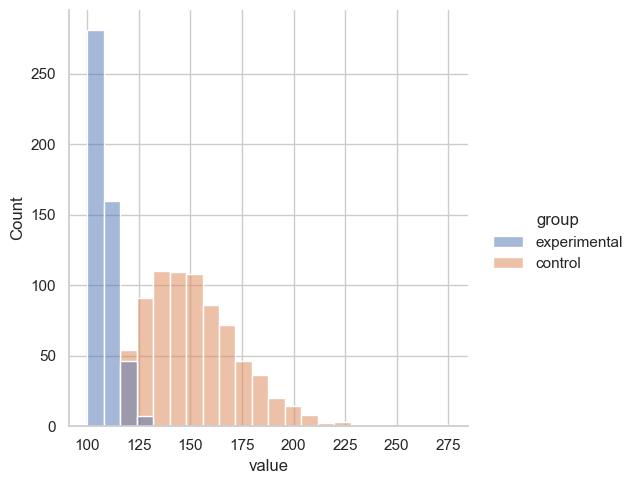

In [6]:
sns.displot(df, x='value', hue='group')

In [7]:
df.groupby('group').agg({'value': 'median'})

,value
group,
control,148.832127
experimental,106.982597


In [8]:
exper = df.query("group == 'experimental'")
control = df.query("group == 'control'")

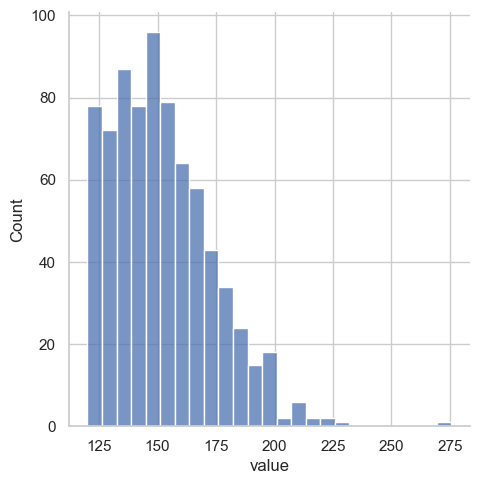

In [9]:
sns.displot(control, x= 'value')

In [10]:
control.value.median()

148.83212650911054

In [11]:
sample_df = control.sample(frac=1, replace=True)

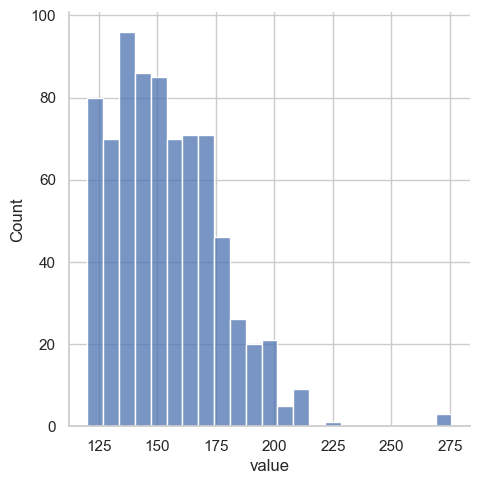

In [12]:
sns.displot(sample_df,x= 'value')

In [13]:
medians=[]

In [14]:
n = 10000

In [15]:
for i in range(10000):
    sample_data = control.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

In [16]:
medians

[148.5028735505605,
 147.98720444250745,
 148.74897211094245,
 149.7302200566907,
 148.24930295543135,
 150.6310178718284,
 147.25097107944651,
 149.43265413917985,
 148.98437192565694,
 148.57811309188975,
 148.83849404127113,
 148.09370163386967,
 148.15185337057133,
 150.2370798861362,
 148.5838626749471,
 148.9119700714488,
 147.73338884652108,
 148.1921136216389,
 149.16182482249332,
 147.86693933699087,
 148.04535617920914,
 148.91089589547929,
 149.98173986258797,
 148.035549897168,
 149.7853574914596,
 146.44113551265522,
 150.19538526166258,
 148.035549897168,
 148.1921136216389,
 148.83849404127113,
 149.42935835643598,
 148.62455967658255,
 149.50134134974752,
 149.25410340461525,
 149.5537462248762,
 148.5028735505605,
 149.18184586039288,
 148.83212650911054,
 147.94781890169762,
 148.72515932676626,
 148.04144958256046,
 147.94781890169762,
 148.5046337369929,
 149.56518317533954,
 148.54316567331168,
 148.53290402804834,
 149.25410340461525,
 150.2466423255614,
 148.9832

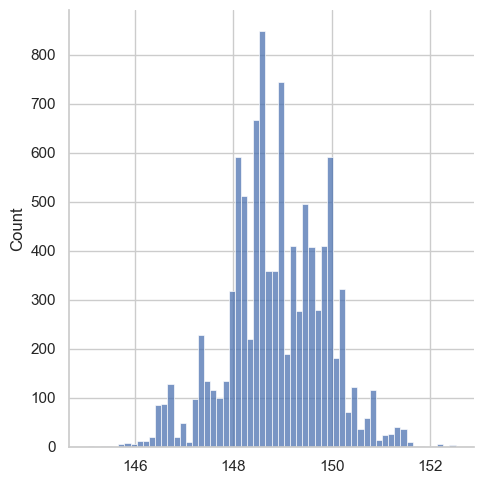

In [17]:
sns.displot(medians)

In [18]:
pd.Series(medians).quantile(0.975)

150.79195404716057

In [19]:
pd.Series(medians).quantile(0.025)

146.67710291645344

95 % медиан оказались [146.6880401407746,150.79195404716057] в группе control

In [20]:
#тоже самое но используем функцию
bootstrap((control.value, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.62953345264657, high=150.7763799798184), bootstrap_distribution=array([149.96896629, 150.51623423, 148.5247798 , ..., 148.74897211,
       149.34008299, 148.61881009]), standard_error=1.000695454281481)

In [23]:
bootstrap((exper.value, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=106.23062332625358, high=107.79741396723091), bootstrap_distribution=array([106.9996611 , 106.99167611, 106.74003213, ..., 106.8460691 ,
       107.3257002 , 106.80879707]), standard_error=0.40958402730416954)

In [34]:
#медианы стат значимо различаются